In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

C:\Users\Shalini\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 72s 6us/step


In [3]:
train_images = mnist_train_images.reshape(60000,784)
test_images = mnist_test_images.reshape(10000,784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [6]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


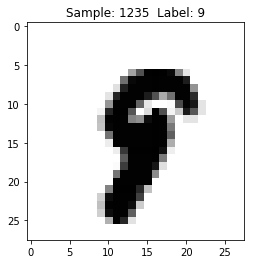

In [12]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1235)

In [30]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

In [34]:
history = model.fit(train_images, train_labels,
                   batch_size=100,
                   epochs=10,
                   verbose=2,
                   validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 18s - loss: 0.3224 - acc: 0.9017 - val_loss: 0.1212 - val_acc: 0.9635
Epoch 2/10
 - 18s - loss: 0.1651 - acc: 0.9521 - val_loss: 0.1007 - val_acc: 0.9717
Epoch 3/10
 - 18s - loss: 0.1368 - acc: 0.9623 - val_loss: 0.0923 - val_acc: 0.9739
Epoch 4/10
 - 18s - loss: 0.1244 - acc: 0.9657 - val_loss: 0.0966 - val_acc: 0.9747
Epoch 5/10
 - 18s - loss: 0.1171 - acc: 0.9689 - val_loss: 0.0988 - val_acc: 0.9771
Epoch 6/10
 - 18s - loss: 0.1069 - acc: 0.9714 - val_loss: 0.0939 - val_acc: 0.9778
Epoch 7/10
 - 18s - loss: 0.1016 - acc: 0.9738 - val_loss: 0.1004 - val_acc: 0.9785
Epoch 8/10
 - 18s - loss: 0.0997 - acc: 0.9746 - val_loss: 0.0968 - val_acc: 0.9776
Epoch 9/10
 - 18s - loss: 0.0962 - acc: 0.9757 - val_loss: 0.0956 - val_acc: 0.9808
Epoch 10/10
 - 18s - loss: 0.0995 - acc: 0.9761 - val_loss: 0.0881 - val_acc: 0.9820


In [32]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

RuntimeError: The model needs to be compiled before being used.

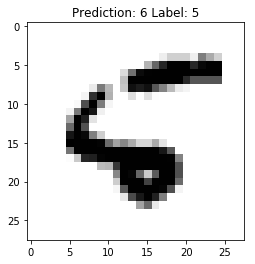

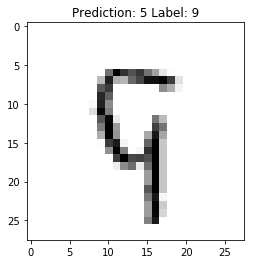

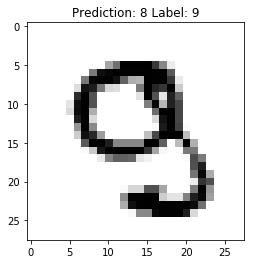

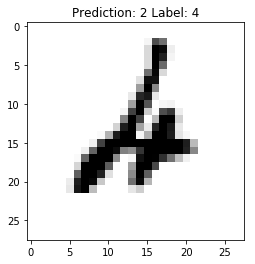

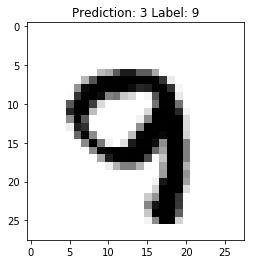

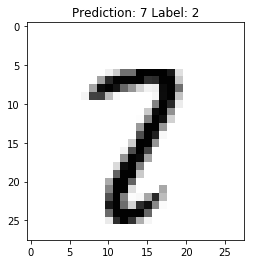

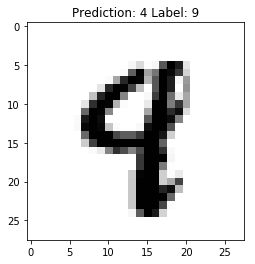

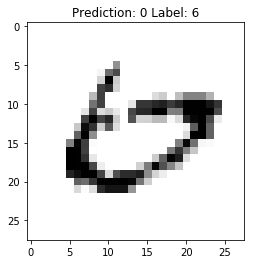

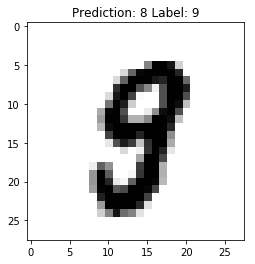

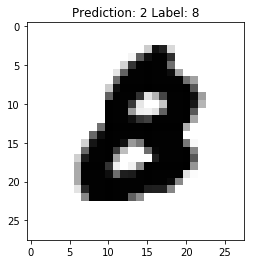

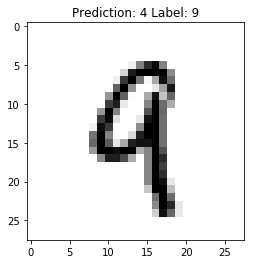

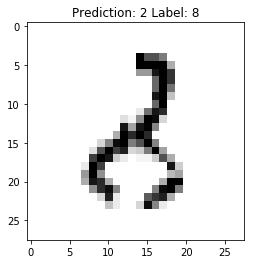

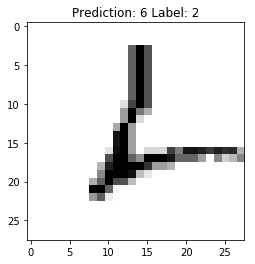

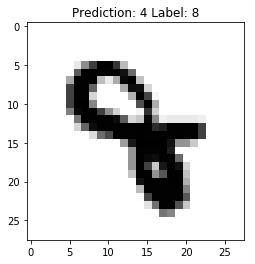

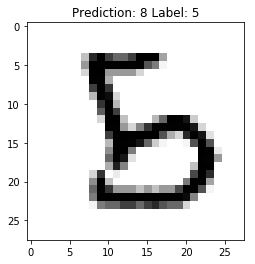

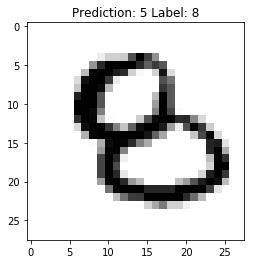

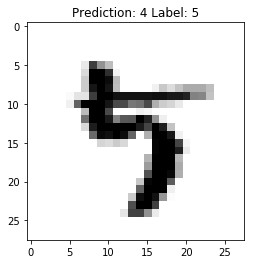

In [21]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()